## Task 9: Библиотека Seaborn
Итак, в предыдущих упражнениях мы иногда не брали в расчет лабораторное задание project1. В рамках него был соревновательный проект. Оно имело более длительные сроки сдачи и гораздо больше коммитов, чем обычное лабораторное задание. Давайте проанализируем динамику коммитов в этом проекте на одного пользователя. На этот раз мы будем использовать другую библиотеку для визуализации данных в Python — Seaborn. Эта библиотека упрощает создание стильных графиков.

Выполните необходимые шаги по созданию следующего графика:

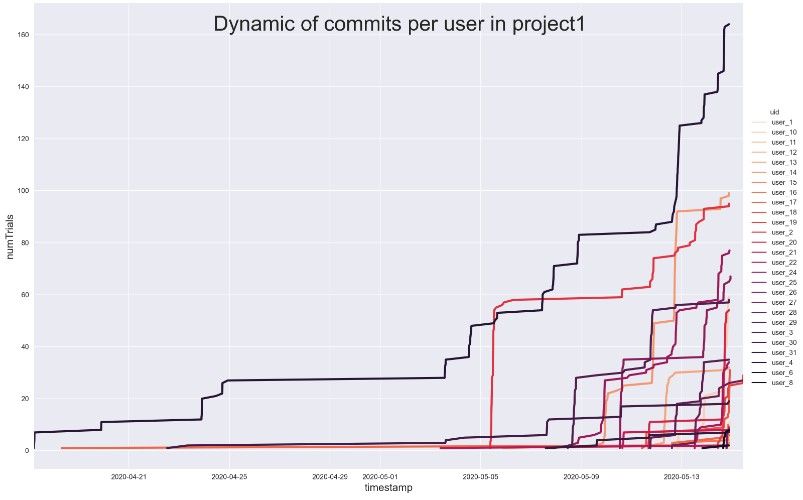

1. Анализируйте только пользователей, а не администраторов.
2. Учитывайте только записи из таблицы checker со статусом ready.
3. Выбирайте цветовую палитру по своему усмотрению.
4. Ширина линии — 3.
5. Фон графика — серый.
6. Высота — 10, а ширина — 1,5х по отношению к высоте.
7. Размер шрифта заголовка — 30.
8. Размер шрифта меток осей — 15.
9. В конце Jupyter Notebook создайте ячейку с разметкой и вставьте вопросы (ответьте на них, глядя только на графики):

 - «Какой пользователь имел самое большое количество коммитов на протяжении почти всего времени?». Ответ: user_4.
 - «Какой пользователь был лидером по количеству коммитов, но в течение очень ограниченного периода времени?». Ответ: user_2.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
conn = sqlite3.connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [4]:
query = """
select uid, numTrials, timestamp
from checker
where status = 'ready'
and uid like "user_%"
and labname like "project1"
"""
df = pd.io.sql.read_sql(query, conn, parse_dates = 'timestamp')
df.head()

,uid,numTrials,timestamp
0,user_4,1,2020-04-17 05:19:02.744528
1,user_4,2,2020-04-17 05:22:45.549397
2,user_4,3,2020-04-17 05:34:24.422370
3,user_4,4,2020-04-17 05:43:27.773992
4,user_4,5,2020-04-17 05:46:32.275104


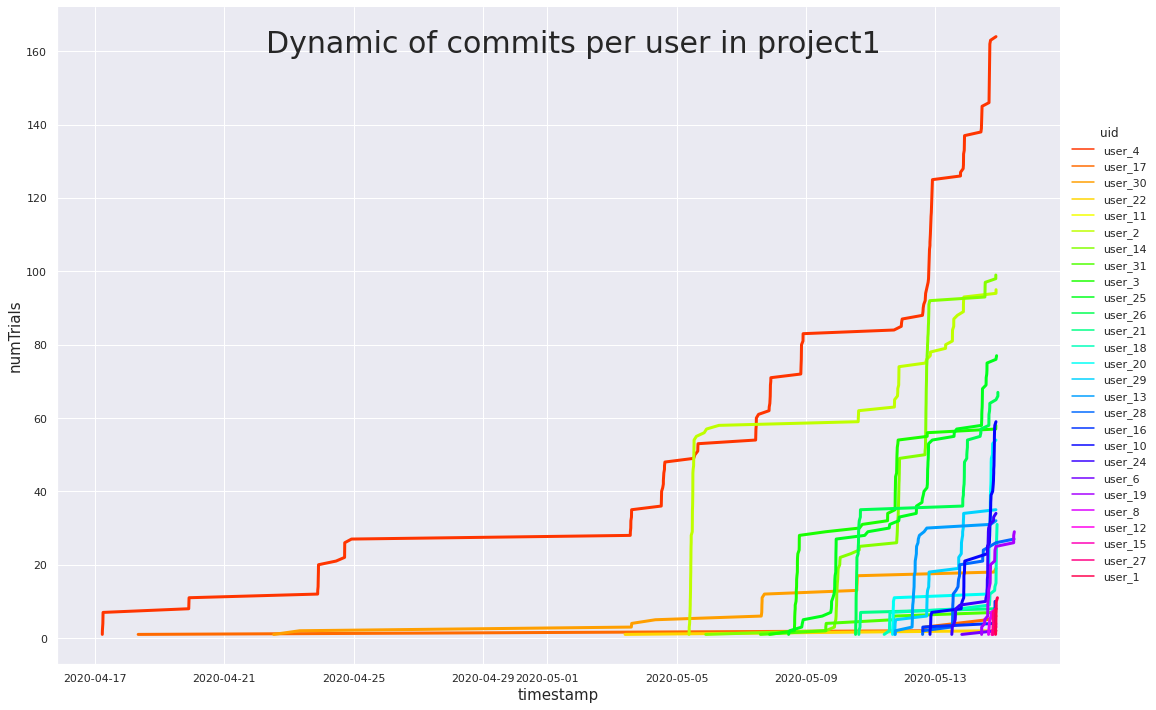

In [5]:
sns.set()
sns.relplot(data=df,
            x='timestamp',
            y='numTrials',
            hue='uid',
            kind='line',
            height=10, 
            aspect=1.5,
            linewidth = 3,
            palette="hsv"
            )
plt.suptitle('Dynamic of commits per user in project1', y = 0.95, fontsize=30)
plt.xlabel('timestamp', fontsize=15)
plt.ylabel('numTrials', fontsize=15)
#leg = plt.legend()
#for legobj in leg.legendHandles:
 #   legobj.set_linewidth(10.0)
plt.show()


In [6]:
conn.close()

 - «Какой пользователь имел самое большое количество коммитов на протяжении почти всего времени?». Ответ: user_4.
 - «Какой пользователь был лидером по количеству коммитов, но в течение очень ограниченного периода времени?». Ответ: user_2.